In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]

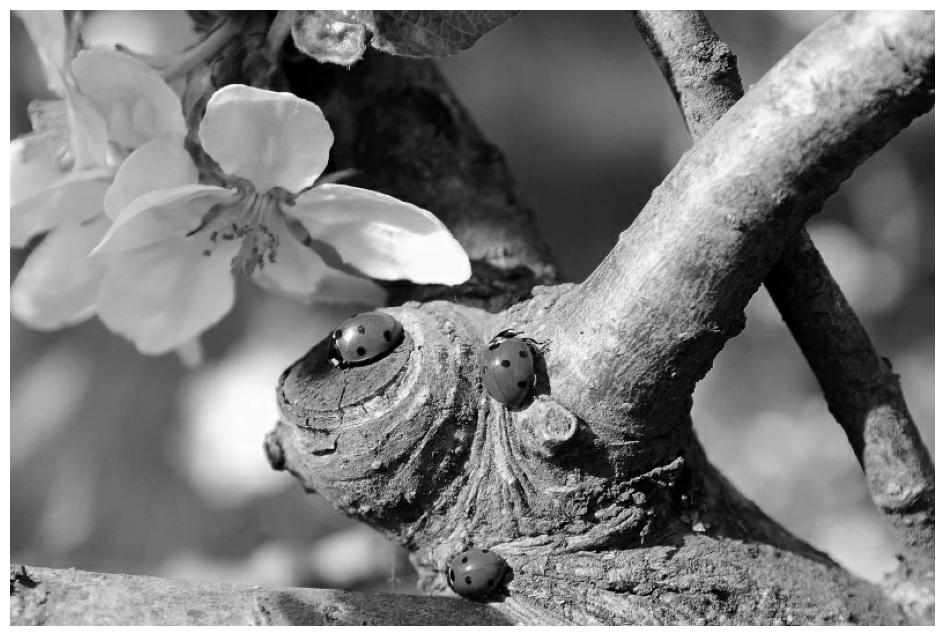

In [3]:
A = imread('6.webp')
X = np.mean(A,-1) # convert RGB to grayscale

#img = plt.imshow(256-X)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

(533,)


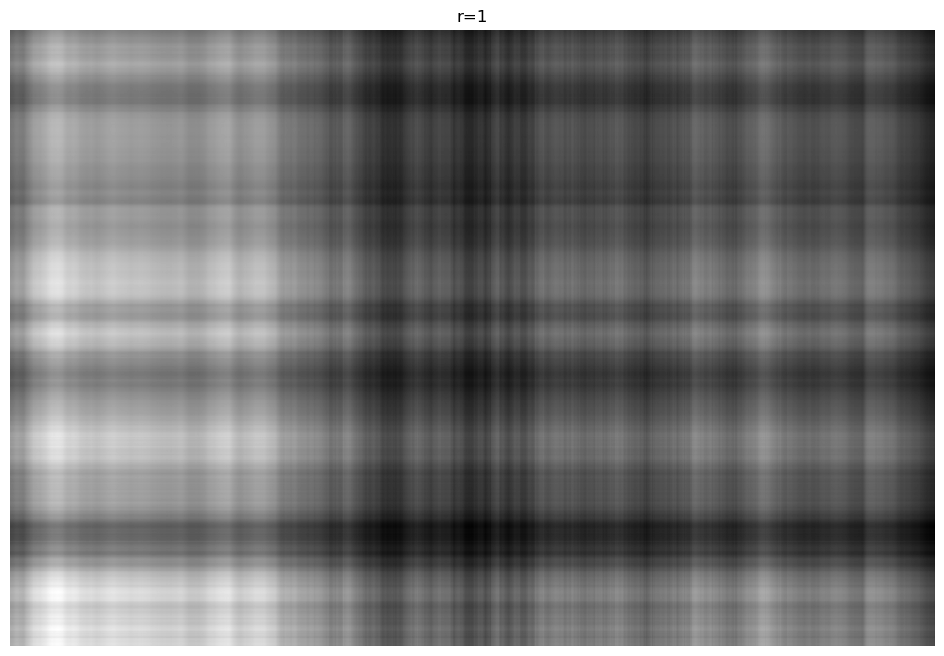

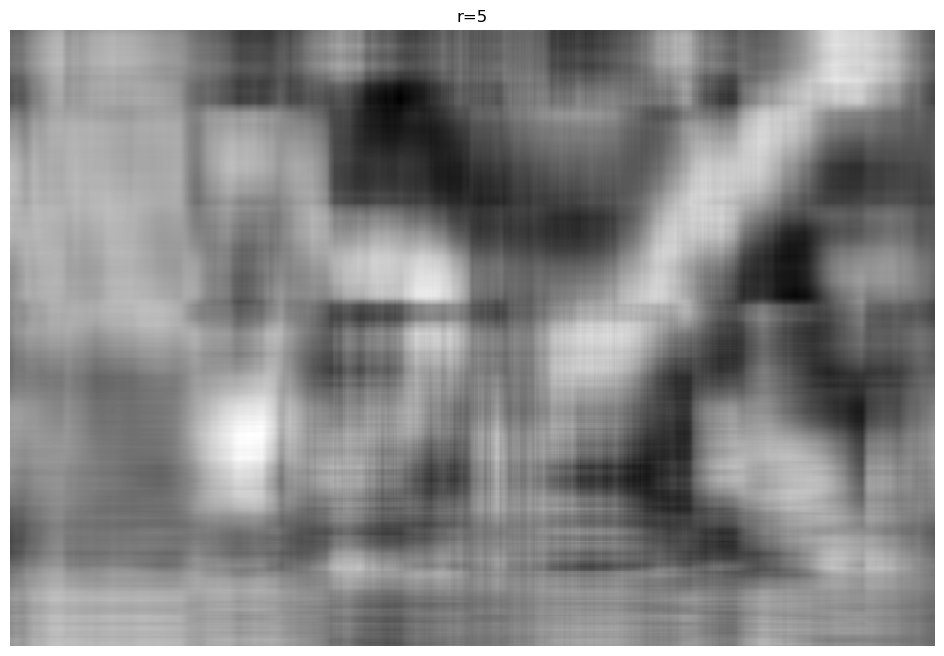

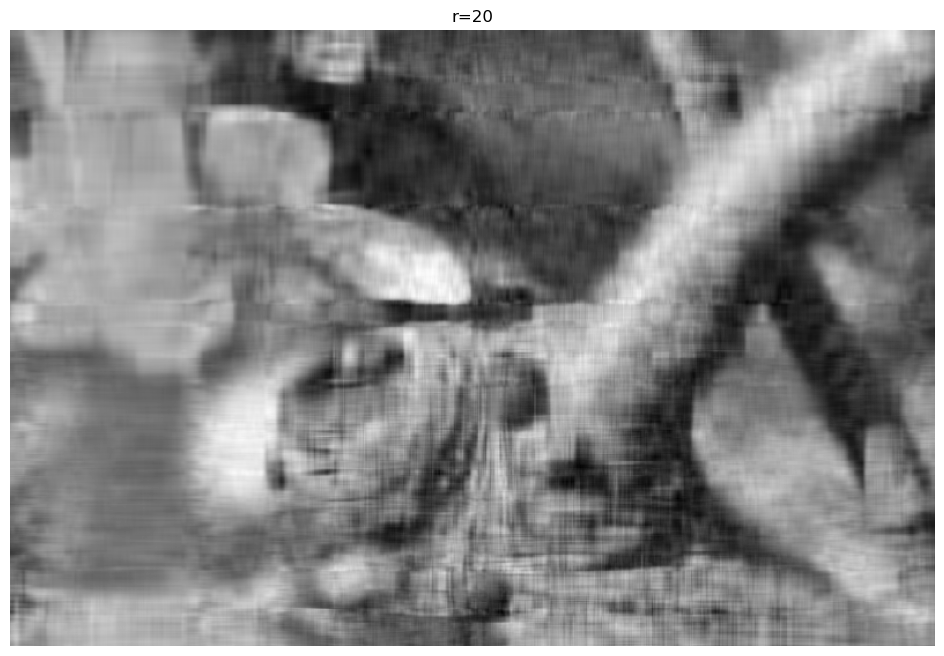

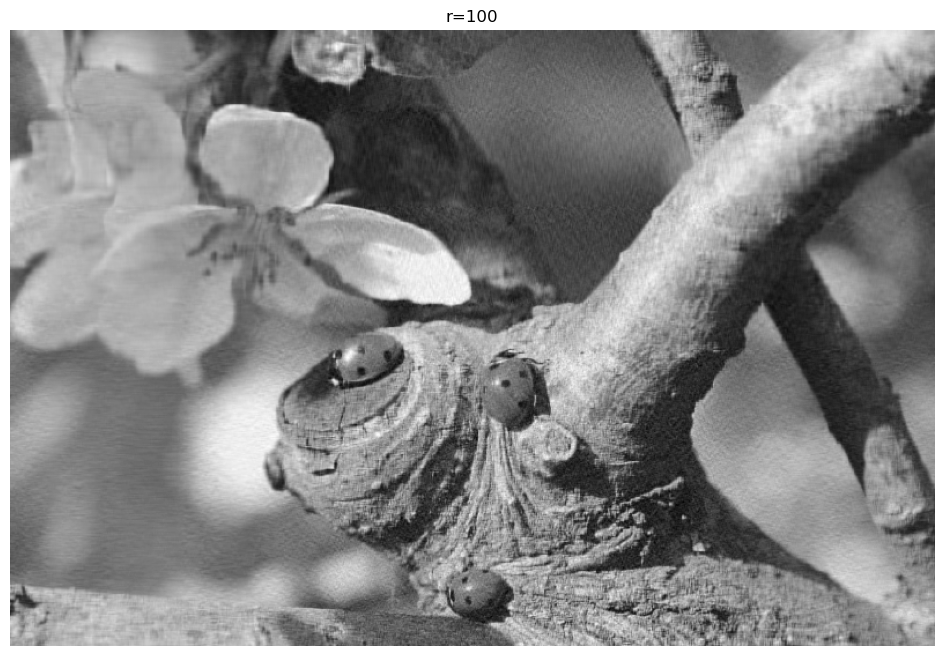

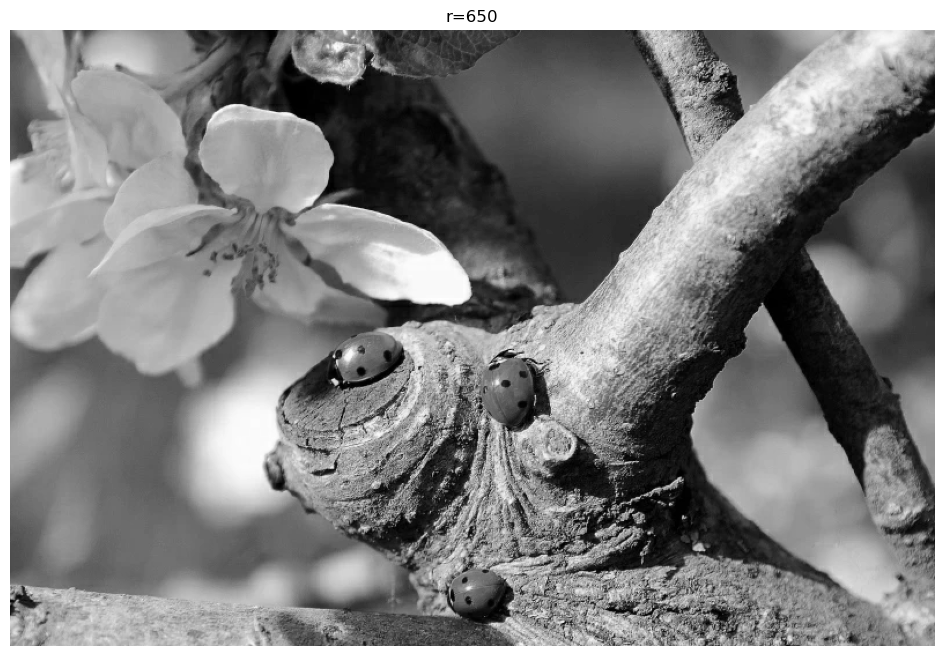

In [6]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
print(S.shape)
S = np.diag(S)


j=0
for r in (1,5,20,100,650):
    # Construct approximate image
    Xapprox = U[:,:r]@S[0:r,:r]@VT[:r,:]
    plt.figure(j+1)
    j += 1
    #img = plt.imshow(256-Xapprox)
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r='+str(r))
    plt.show()

Liczba wartości singularnych potrzebna do zachowania 90% energii: 4


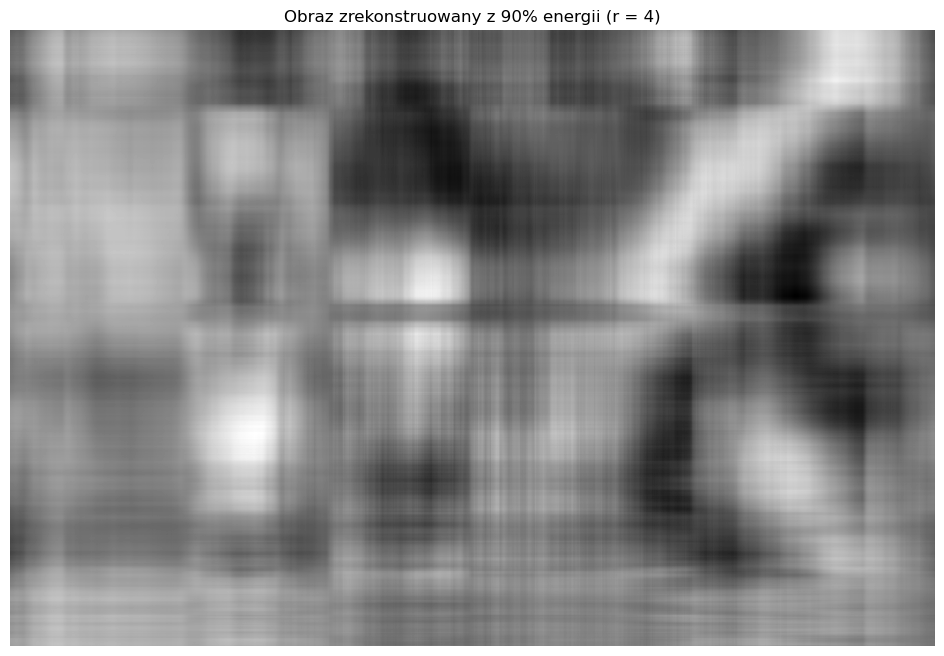

In [7]:
# Krok 1: Rozkład SVD
U, s, VT = np.linalg.svd(X, full_matrices=False)

# Krok 2: Oblicz skumulowaną energię
energy = np.cumsum(s**2)
total_energy = energy[-1]
cumulative_ratio = energy / total_energy

# Krok 3: Znajdź minimalne r, dla którego energia ≥ 90%
k_90 = np.searchsorted(cumulative_ratio, 0.90) + 1
print(f'Liczba wartości singularnych potrzebna do zachowania 90% energii: {k_90}')

# Krok 4: Zrekonstruuj obraz
S_90 = np.diag(s[:k_90])
X_approx_90 = U[:, :k_90] @ S_90 @ VT[:k_90, :]

# Krok 5: Pokaż zrekonstruowany obraz
plt.imshow(X_approx_90, cmap='gray')
plt.axis('off')
plt.title(f'Obraz zrekonstruowany z 90% energii (r = {k_90})')
plt.show()